In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib_inline as plt

In [75]:
diabetes = pd.read_csv('data\diabetes_data.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female


In [76]:
mask_dup_search = diabetes.duplicated(subset=diabetes.columns)
drop_diabetes = diabetes[mask_dup_search]
display(diabetes.shape[0])
diabetes = diabetes.drop_duplicates(subset=diabetes.columns)
display(diabetes.shape[0])

778

768

In [77]:
useless_data=[]
for col in diabetes.columns:
    freq  = diabetes[col].value_counts(normalize=True).max()
    print(freq)
    print('')
    uniq= diabetes[col].nunique()/diabetes[col].count()
    print(uniq)
    if freq > 0.95:
        useless_data.append(col)
    if uniq > 0.95:
        useless_data.append(col)
print(useless_data) 
display(diabetes.shape[1])
diabetes = diabetes.drop(useless_data,axis=1)   
display(diabetes.shape[1])

0.17578125

0.022135416666666668
0.022135416666666668

0.17708333333333334
0.07421875

0.061197916666666664
0.2955729166666667

0.06640625
0.4869791666666667

0.2421875
0.016927083333333332

0.3229166666666667
0.0078125

0.6731770833333334
0.09375

0.06770833333333333
0.6510416666666666

0.0026041666666666665
1.0

0.0013020833333333333
['Gender']


10

9

In [78]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols: 
    diabetes[col]=diabetes[col].apply(lambda x: None if x == 0 else x)
round(diabetes['Insulin'].isnull().value_counts(normalize = True),2)

False    0.51
True     0.49
Name: Insulin, dtype: float64

In [79]:
col_non_inf = []
for col in diabetes.columns:
    nan_in_df= diabetes[col].isna().sum()
    percent_nan = nan_in_df/diabetes[col].shape[0]
    print(percent_nan)
    if percent_nan > 0.3:
        col_non_inf.append(col)
print(col_non_inf)
for n in col_non_inf:   
    diabetes = diabetes.drop(n,axis=1)
diabetes.shape[1]

0.0
0.006510416666666667
0.045572916666666664
0.2955729166666667
0.4869791666666667
0.014322916666666666
0.0
0.0
0.0
['Insulin']


8

In [80]:
diabetes.shape[0]

768

In [81]:
diabetes_drop_two_nan = diabetes
for ind in range(diabetes.shape[0]):
    if diabetes.iloc[ind].isna().sum()>2:
        diabetes_drop_two_nan=diabetes_drop_two_nan.drop(index = ind)

In [82]:
diabetes_drop_two_nan.shape[0]

761

In [83]:
diabetes = diabetes_drop_two_nan

In [84]:
diabetes['Glucose'].median()

117.0

In [85]:
for col in diabetes.columns:
    diabetes[col]=diabetes[col].fillna(diabetes[col].median(), axis = 0)

In [86]:
diabetes['SkinThickness'].mean()

29.109067017082786

In [87]:
def quntile(data,feature):
    q1 = data[feature].quantile(q=0.25)
    q3 = data[feature].quantile(q=0.75)
    iqr = q3-q1
    lower = q1-1.5*iqr
    upper = q3+1.5*iqr
    inner = 0
    outer = 0
    for i in data[feature]:
        if lower < i < upper:
            inner+=1
        else:
            outer+=1
    return inner,outer        


In [88]:
inner_count,outer_count = quntile(diabetes,'SkinThickness')
print(inner_count,outer_count)

674 87


In [89]:
def z_metod(data,feature):
    lower = data[feature].mean()-3*np.std(data[feature])
    upper = data[feature].mean()+3*np.std(data[feature])
    inner = 0
    outer = 0
    for i in data[feature]:
        if lower < i < upper:
            inner+=1
        else:
            outer+=1
    return inner,outer        


In [90]:
inner_count,outer_count = z_metod(diabetes,'SkinThickness')
print(inner_count,outer_count)

757 4


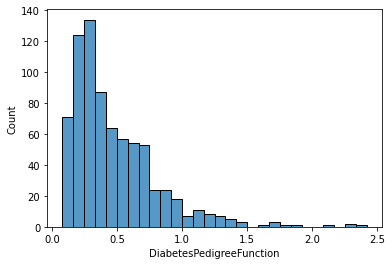

In [94]:
hist = sns.histplot(diabetes, x ='DiabetesPedigreeFunction')

In [98]:
inner_count,outer_count = quntile(diabetes,'DiabetesPedigreeFunction')
print(inner_count,outer_count)

732 29


In [100]:
log_diabetes = np.log(diabetes)

c:\Python\Python39\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


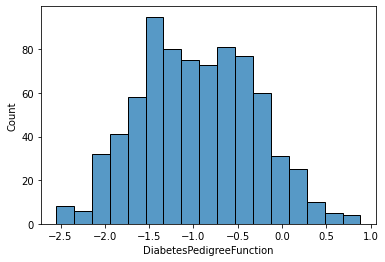

In [102]:
hist = sns.histplot(log_diabetes['DiabetesPedigreeFunction'])

In [103]:
inner_count_log,outer_count_log = quntile(log_diabetes,'DiabetesPedigreeFunction')
print(inner_count_log,outer_count_log )

761 0


In [105]:
outer_count-outer_count_log

29